<a href="https://www.kaggle.com/code/babsmatt/babsmatt-fraud-detection?scriptVersionId=198946587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="alert alert-success"> 
        <h1 align="center" style="color:red;">Classification: Fraud Transaction Detection
</h1>  
     
</div>

# Importing libraries and Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#https://www.kaggle.com/datasets/babsmatt/fraud-banking-transaction/data?select=Fraud_083716.csv
data = pd.read_csv("/kaggle/input/fraud-banking-transaction/Fraud_083716.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Cheching for Null values and Statistical Description

In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
data.select_dtypes(include=['int64', 'float']).corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Exploratory Data Analysis

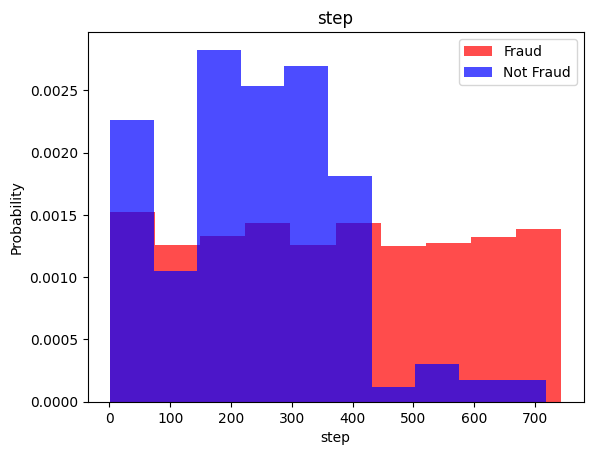

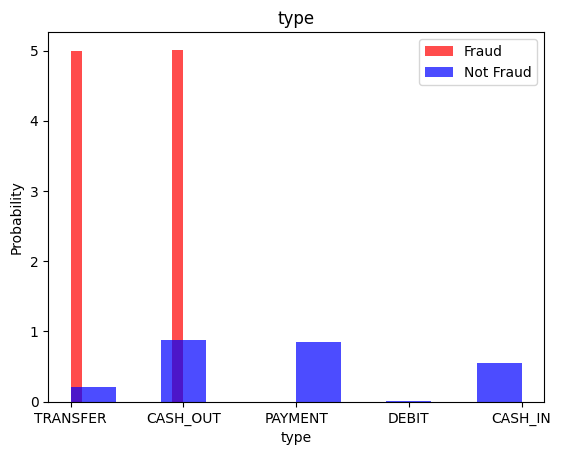

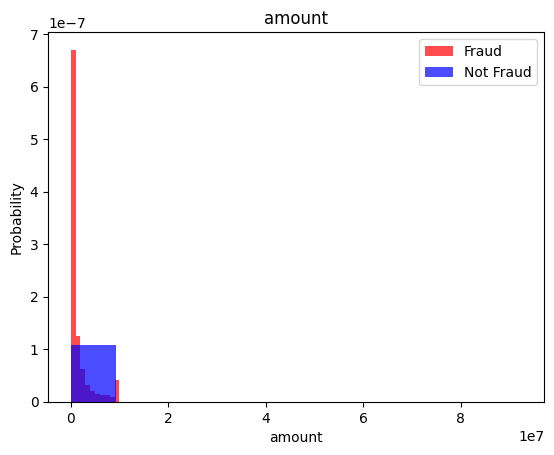

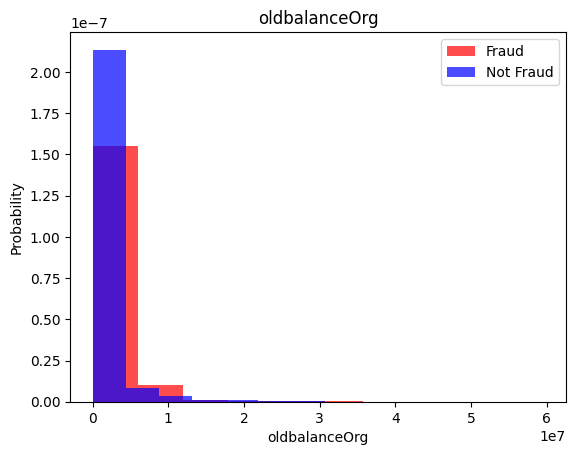

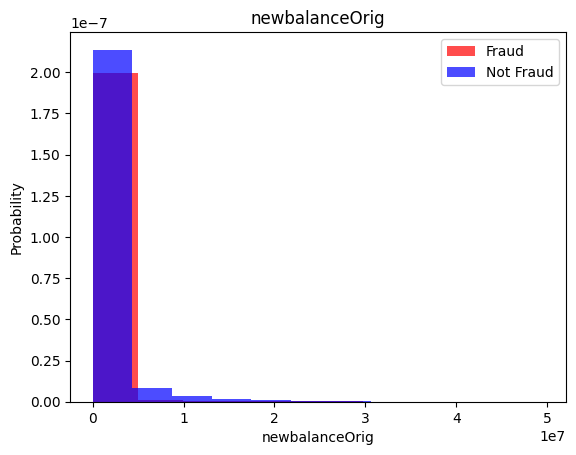

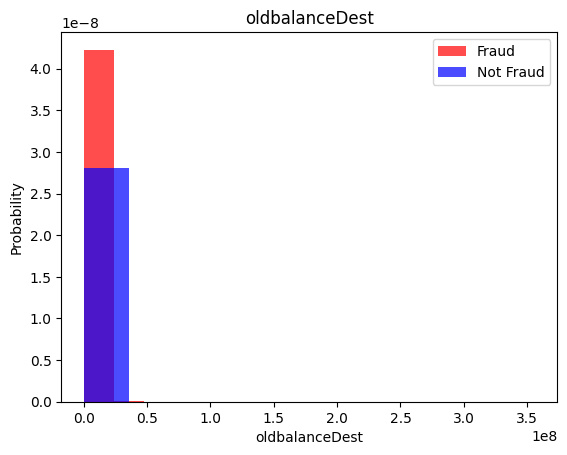

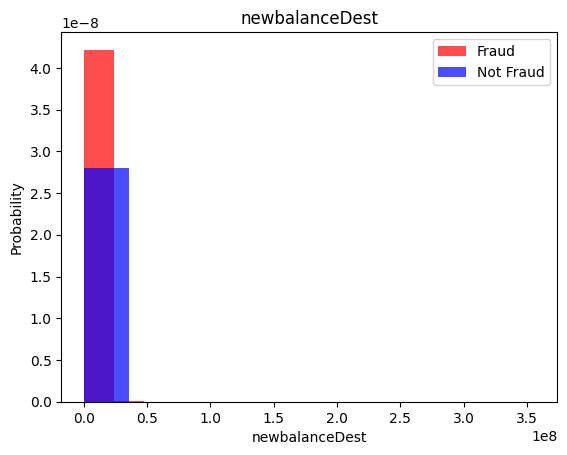

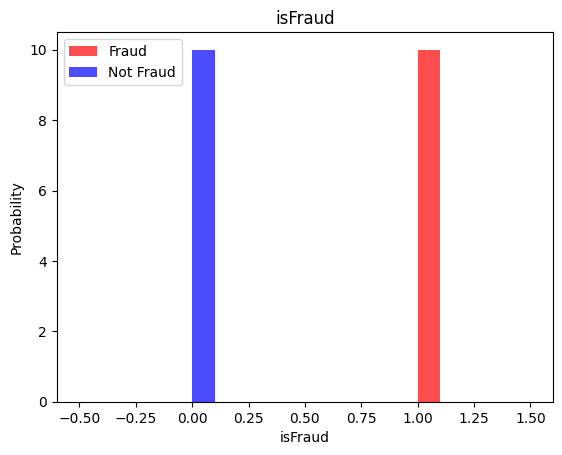

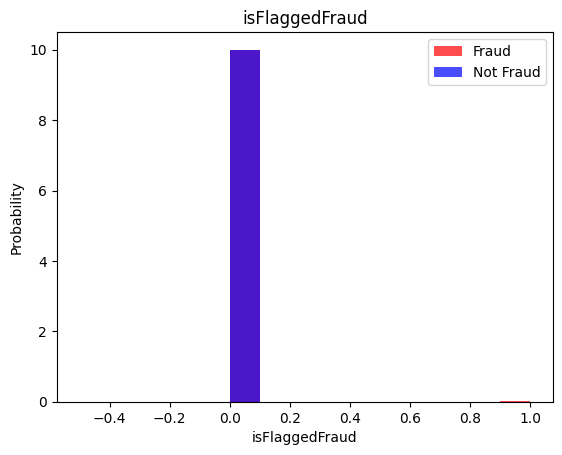

In [8]:
column_now = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

for label in column_now:
    plt.hist(data[data['isFraud']==1][label], color='red',label='Fraud', alpha=0.7, density=True)
    plt.hist(data[data['isFraud']==0][label], color='blue',label='Not Fraud', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

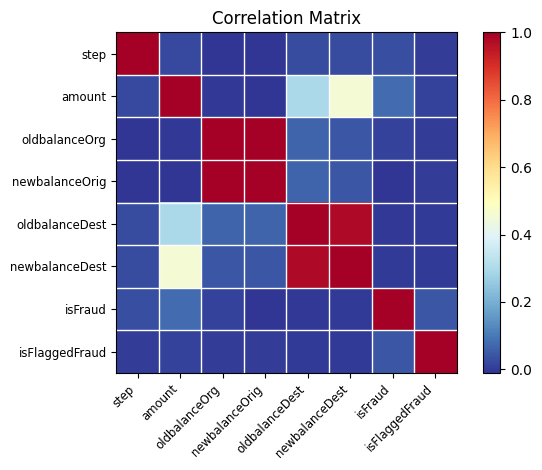

In [9]:
import statsmodels.api as sm
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


corr = data.drop(['type','nameOrig','nameDest'], axis=1).corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Data Preprocessing

In [10]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# i am dropping columns nameOrig and nameDest as they logically don't affect the analysis

#data.drop(['nameOrig','nameDest'], axis=1, inplace=True)

# Spliting data to features and target variables
X = data.drop(['nameOrig','nameDest'], axis=1).values
y = data['isFraud'].values

# Transforming and imputing other columns
ct = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(categories='auto'),[1])],
                      remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=float)



# Model Training: LogisticRegression

In [11]:
# Spliting data to test and train set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=10)

# Define the model
model = LogisticRegression()

model.fit(X_train,y_train)


LogisticRegression()

In [12]:
#R square for LogisticRegression
model.score(X_train,y_train)

0.9983055329408326

In [13]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model.predict(X_test)))
print(metrics.confusion_matrix(y_test, model.predict(X_test)))
print(metrics.classification_report(y_test, model.predict(X_test)))

0.9982742958089592
[[1269622    1232]
 [    964     706]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270854
           1       0.36      0.42      0.39      1670

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524



Seeing that the Accuracy Score of the model on the train data and test set are approximately the csame thing...99.8%
So, we can say the Model did well and not overfitted.

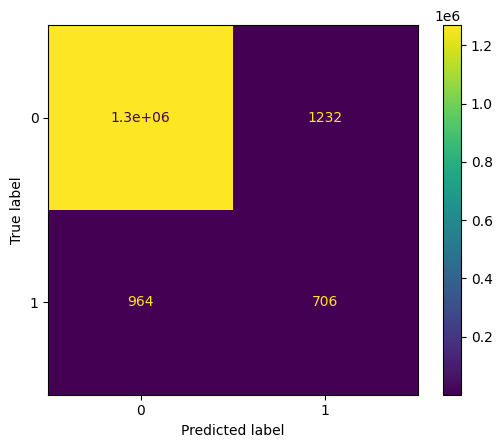

In [14]:
# Visualize the Confusion Matrix of rthe Test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()

In [15]:
# Roc value for model
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict(X_test))

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7108925320800594


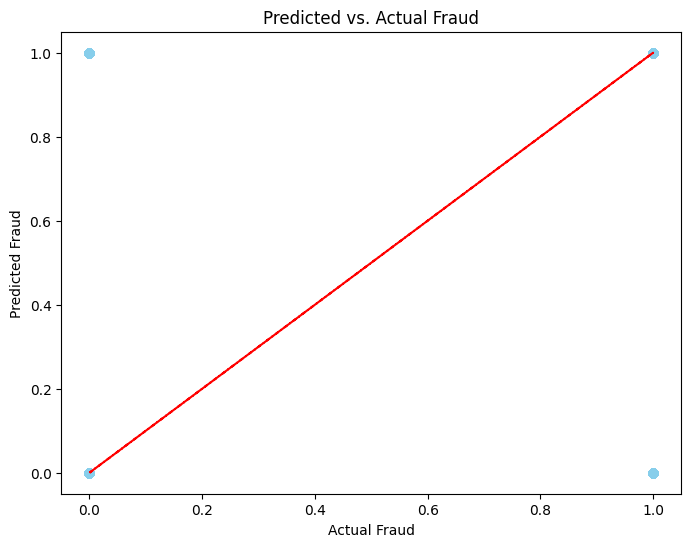

In [16]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model.predict(X_test), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Fraud')
plt.xlabel('Actual Fraud')
plt.ylabel('Predicted Fraud')
plt.show()

# Feature Engineering
### Due to High Accuracy Level and ROC value which shows possibility of Overfitting

In [17]:
# Spliting data to test and train set, now stratifying anf=d shuffling and increasing training set to 90%
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.90, random_state=10, shuffle=True, stratify=y)

# Define the model
model1 = LogisticRegression()

model1.fit(X_train,y_train)


LogisticRegression()

In [18]:
#R square for LogisticRegression
model1.score(X_train,y_train)

0.9982529908189464

In [19]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, model1.predict(X_test)))
print(metrics.confusion_matrix(y_test, model1.predict(X_test)))
print(metrics.classification_report(y_test, model1.predict(X_test)))

0.9982491489355014
[[634793    648]
 [   466    355]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635441
           1       0.35      0.43      0.39       821

    accuracy                           1.00    636262
   macro avg       0.68      0.72      0.69    636262
weighted avg       1.00      1.00      1.00    636262



Seeing the Accuracy score for both Train and test data even after feature engineering still remains closely same.

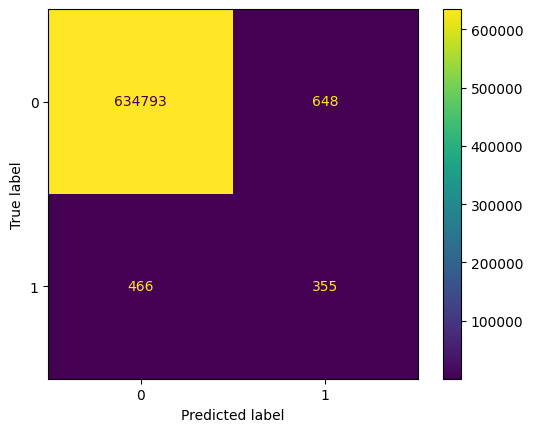

In [20]:
# Visializing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model1.predict(X_test), labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)

disp.plot()
plt.show()

In [21]:
# Roc value for model
fpr, tpr, _ = metrics.roc_curve(y_test, model1.predict(X_test))

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7156898742812737


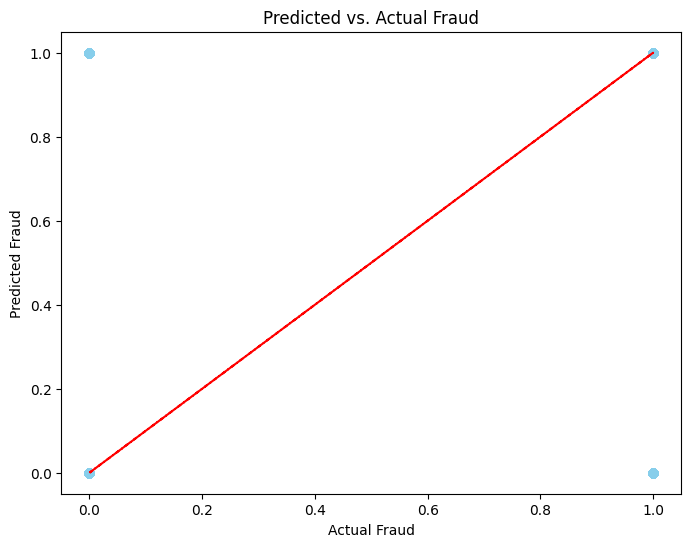

In [22]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, model1.predict(X_test), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Fraud')
plt.xlabel('Actual Fraud')
plt.ylabel('Predicted Fraud')
plt.show()

With both models; model and model1, the roc_auc value is closely around 0.7